
Nome dos Integrantes:

Izabela Ramos Ferreira	    RM 352447

Kaique Vinicius Lima Soares	RM 351437

Walder Octacilio Garbellott	RM 352469


github: https://github.com/MissHead/cognitive-environments


Análise Exploratória dos Dados (EDA)
dataset: https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


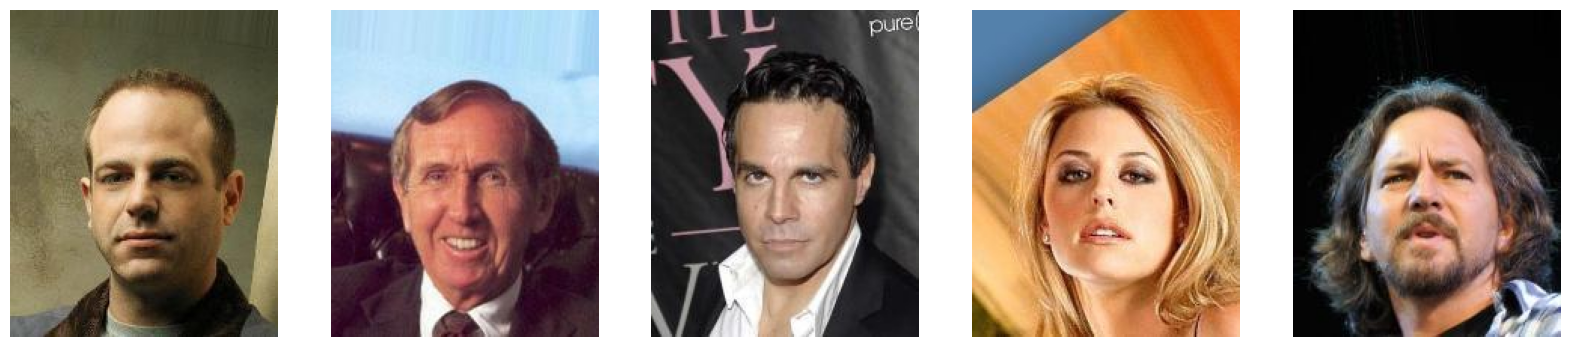

In [5]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
from PIL import Image

drive.mount('/content/drive')

image_dir = '/content/drive/My Drive/fiap'
images = os.listdir(image_dir)

# Exibir algumas imagens
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, img_file in enumerate(images[:5]):
    img = Image.open(os.path.join(image_dir, img_file))
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

Pré-processamento de Dados

	•	Redimensionar e normalizar as imagens.
	•	Dividir os dados em conjuntos de treino e teste.

In [6]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def load_images(image_dir, image_size=(128, 128)):
    images = []
    labels = []
    for img_file in os.listdir(image_dir):
        if ".jpg" in img_file:
            img = Image.open(os.path.join(image_dir, img_file)).resize(image_size)
            img_array = np.array(img)
            images.append(img_array)
            label = 1 if 'real' in img_file else 0
            labels.append(label)
    return np.array(images), np.array(labels)

image_dir = '/content/drive/My Drive/fiap'
images, labels = load_images(image_dir)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

# Salvar dados processados
processed_dir = 'data/processed'
os.makedirs(processed_dir, exist_ok=True)
np.save(os.path.join(processed_dir, 'X_train.npy'), X_train)
np.save(os.path.join(processed_dir, 'X_test.npy'), X_test)
np.save(os.path.join(processed_dir, 'y_train.npy'), y_train)
np.save(os.path.join(processed_dir, 'y_test.npy'), y_test)

Desenvolvimento do Modelo

- treinar e avaliar diferentes modelos.

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report

# Carregar dados processados
X_train = np.load('data/processed/X_train.npy')
X_test = np.load('data/processed/X_test.npy')
y_train = np.load('data/processed/y_train.npy')
y_test = np.load('data/processed/y_test.npy')

# Normalizar os dados
X_train, X_test = X_train / 255.0, X_test / 255.0

# Definir o modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Salvar o modelo
model.save('content/models/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 944ms/step - accuracy: 0.9236 - loss: 0.1063 - val_accuracy: 1.0000 - val_loss: 6.9782e-28
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 863ms/step - accuracy: 1.0000 - loss: 1.1509e-30 - val_accuracy: 1.0000 - val_loss: 3.2377e-31
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 890ms/step - accuracy: 1.0000 - loss: 1.3565e-30 - val_accuracy: 1.0000 - val_loss: 1.4228e-31
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 933ms/step - accuracy: 1.0000 - loss: 4.8520e-31 - val_accuracy: 1.0000 - val_loss: 1.3147e-31
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 884ms/step - accuracy: 1.0000 - loss: 8.2421e-31 - val_accuracy: 1.0000 - val_loss: 1.3052e-31
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 863ms/step - accuracy: 1.0000 - loss: 2.2237e-30 - val_accuracy: 1.0000 - val_loss: 1.3045e-31
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 870ms/step - accuracy: 1.0000 - loss: 1.9788e-30 - val_accuracy: 1.0000 - val_loss: 1.3045e-31
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 853

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



Avaliação do Modelo

- F1 Score

In [10]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
